# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [25]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [26]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(300)

Text(0, 0.5, 'x2')

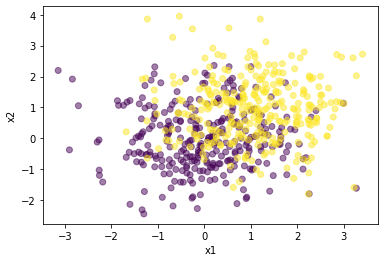

In [27]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import tensorflow as tf

### Create a model that overfits

In [32]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'softmax' activation


########################
model = Sequential()
model.add(Dense(50, input_shape=(2, ), activation='relu'))
model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='softmax'))
########################


In [33]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.3)
########################

In [34]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
########################

In [38]:
# Start training and fit your model with desired parameters and validation_split=0.2
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
########################
history = model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2,callbacks=[callback])
########################

Epoch 1/40
34/34 [==============================] - 2s 18ms/step - loss: 1.5045 - accuracy: 0.4792 - val_loss: 1.3119 - val_accuracy: 0.5476
Epoch 2/40
34/34 [==============================] - 0s 4ms/step - loss: 1.2071 - accuracy: 0.4792 - val_loss: 1.0868 - val_accuracy: 0.5476
Epoch 3/40
34/34 [==============================] - 0s 3ms/step - loss: 1.0175 - accuracy: 0.4792 - val_loss: 0.9458 - val_accuracy: 0.5476
Epoch 4/40
34/34 [==============================] - 0s 4ms/step - loss: 0.8925 - accuracy: 0.4792 - val_loss: 0.8401 - val_accuracy: 0.5476
Epoch 5/40
34/34 [==============================] - 0s 4ms/step - loss: 0.8025 - accuracy: 0.4792 - val_loss: 0.7659 - val_accuracy: 0.5476
Epoch 6/40
34/34 [==============================] - 0s 4ms/step - loss: 0.7444 - accuracy: 0.4792 - val_loss: 0.7186 - val_accuracy: 0.5476
Epoch 7/40
34/34 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.4792 - val_loss: 0.6826 - val_accuracy: 0.5476
Epoch 8/40
34/34 [=

### Plot Your Results

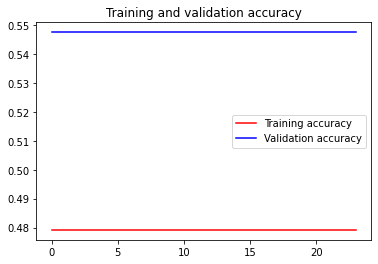

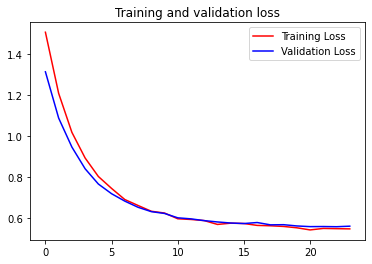

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [16]:
# Evaluate your model with train and test data


########################
model.evaluate(
    x=X_test,
    y=y_test,
)
########################

1/1 [==============================] - 0s 37ms/step - loss: 0.7382 - accuracy: 0.3889


[0.7382034659385681, 0.3888888955116272]

# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results